In [2]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("dados_saneados_bd.csv", encoding="utf-8")

data.head()

,ano,presidente,data_pagamento,cpf_servidor,cpf_cnpj_fornecedor,nome_fornecedor,tipo,subelemento_despesa,cdic,valor,indice_ajustado,indice_hist_ajustado,valor_ajustado,valor_hist_ajustado
0,2008,Lula,2008-12-17,***.868.251-**,00866577000857,SAUIPE S.A - SAUIPE PARK,C,HOSPEDAGENS,00150.001957/2008-15.R.08.26/11/2008.31/12/2014.N,290176.00,1.387010,2.237955,209209.667830,649400.779796
1,2021,Bolsonaro,2021-01-03,***.784.930-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,C,HOSPEDAGENS,00150.000815/2020-27.R.08.30/01/2021.31/12/2022.N,312903.36,2.672745,1.161378,117071.925842,363399.075780
2,2003,Lula,2003-12-14,***.271.561-**,01720459000122,FULL TIME LOCA€ÇO E SERVI€OS S/C LTDA,C,LOCACAO DE MEIOS DE TRANSPORTE,00200.400362/2004-86.R.08.20/12/2003.31/12/2014.N,103728.40,1.068951,2.903843,97037.550880,301211.038020
3,2008,Lula,2008-12-16,***.868.251-**,04850433000197,SHOWïS ESTRUTURAS E EVENTOS LTDA - ME,C,LOCA€ÇO BENS MOV. OUTR. NATUREZA E INTANGÖVEIS,00150.001957/2008-15.R.08.26/11/2008.31/12/2014.N,124012.50,1.387010,2.237955,89409.923398,277534.372948
4,2003,Lula,2003-06-05,***.010.008-**,01720459000122,FULL TIME LOCA€ÇO E SERVI€OS S/C LTDA,C,LOCACAO DE MEIOS DE TRANSPORTE,00200.222241/2003-98.R.08.21/05/2003.31/12/2014.N,88754.92,1.042936,2.976278,85101.052094,264159.348677


## Cleaning the Data

Removendo símbolos indesejados

In [6]:
dict_replace = {"Ç":"A",
                "€": "C",
                "Ö": "I",
                "µ": "A",
                "¶": "A",
                "å": "O",
                "à": "O",
                "ï":"'",
                "LOCAAÃO ": "LOCAÇÃO"}

data_id = pd.read_csv("dados_filtrados_id.csv", encoding="utf-8")

data_id.replace(dict_replace, regex=True, inplace=True)

data_id.to_feather("feather_data_id")

# data_filtrado_id = data_id.drop_duplicates(subset=["id"])

## replace

#final_data = data_filtrado_id.replace(dict_replace, regex=True, inplace=True)

#final_data.to_feather("cleaned_feather_data_id")

In [7]:
data_id.head()

,ano,presidente,data_pagamento,cpf_servidor,cpf_cnpj_fornecedor,nome_fornecedor,tipo,subelemento_despesa,cdic,valor,indice_ajustado,indice_hist_ajustado,valor_ajustado,valor_hist_ajustado,id
0,2008,Lula,2008-12-17,***.868.251-**,00866577000857,SAUIPE S.A - SAUIPE PARK,C,HOSPEDAGENS,00150.001957/2008-15.R.08.26/11/2008.31/12/2014.N,290176.00,1.387010,2.237955,209209.667830,649400.779796,46374
1,2021,Bolsonaro,2021-01-03,***.784.930-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,C,HOSPEDAGENS,00150.000815/2020-27.R.08.30/01/2021.31/12/2022.N,312903.36,2.672745,1.161378,117071.925842,363399.075780,106519
2,2003,Lula,2003-12-14,***.271.561-**,01720459000122,FULL TIME LOCAAÃO E SERVIAOS S/C LTDA,C,LOCACAO DE MEIOS DE TRANSPORTE,00200.400362/2004-86.R.08.20/12/2003.31/12/2014.N,103728.40,1.068951,2.903843,97037.550880,301211.038020,4662
3,2008,Lula,2008-12-16,***.868.251-**,04850433000197,SHOW´S ESTRUTURAS E EVENTOS LTDA - ME,C,LOCAAÃO BENS MOV. OUTR. NATUREZA E INTANGÍVEIS,00150.001957/2008-15.R.08.26/11/2008.31/12/2014.N,124012.50,1.387010,2.237955,89409.923398,277534.372948,46279
4,2003,Lula,2003-06-05,***.010.008-**,01720459000122,FULL TIME LOCAAÃO E SERVIAOS S/C LTDA,C,LOCACAO DE MEIOS DE TRANSPORTE,00200.222241/2003-98.R.08.21/05/2003.31/12/2014.N,88754.92,1.042936,2.976278,85101.052094,264159.348677,2160


In [67]:
## Dictionary to replace values

dict_replace = {"Ç":"A",
                "€": "C",
                "Ö": "I",
                "µ": "A",
                "¶": "A",
                "å": "O",
                "à": "O",
                "ï":"'"}


data.replace(dict_replace, regex=True, inplace=True)

data.to_pickle("cleaned_data_cartao.pkl")

data.to_feather("cleaned_feather_data")

data.head()

,ano,presidente,data_pagamento,cpf_servidor,cpf_cnpj_fornecedor,nome_fornecedor,tipo,subelemento_despesa,cdic,valor,indice_ajustado,indice_hist_ajustado,valor_ajustado,valor_hist_ajustado
0,2008,Lula,2008-12-17,***.868.251-**,00866577000857,SAUIPE S.A - SAUIPE PARK,C,HOSPEDAGENS,00150.001957/2008-15.R.08.26/11/2008.31/12/2014.N,290176.00,1.387010,2.237955,209209.667830,649400.779796
1,2021,Bolsonaro,2021-01-03,***.784.930-**,43426451000106,HOTUR S PAULO PART E EMPR LTDA,C,HOSPEDAGENS,00150.000815/2020-27.R.08.30/01/2021.31/12/2022.N,312903.36,2.672745,1.161378,117071.925842,363399.075780
2,2003,Lula,2003-12-14,***.271.561-**,01720459000122,FULL TIME LOCACAO E SERVICOS S/C LTDA,C,LOCACAO DE MEIOS DE TRANSPORTE,00200.400362/2004-86.R.08.20/12/2003.31/12/2014.N,103728.40,1.068951,2.903843,97037.550880,301211.038020
3,2008,Lula,2008-12-16,***.868.251-**,04850433000197,SHOW'S ESTRUTURAS E EVENTOS LTDA - ME,C,LOCACAO BENS MOV. OUTR. NATUREZA E INTANGIVEIS,00150.001957/2008-15.R.08.26/11/2008.31/12/2014.N,124012.50,1.387010,2.237955,89409.923398,277534.372948
4,2003,Lula,2003-06-05,***.010.008-**,01720459000122,FULL TIME LOCACAO E SERVICOS S/C LTDA,C,LOCACAO DE MEIOS DE TRANSPORTE,00200.222241/2003-98.R.08.21/05/2003.31/12/2014.N,88754.92,1.042936,2.976278,85101.052094,264159.348677


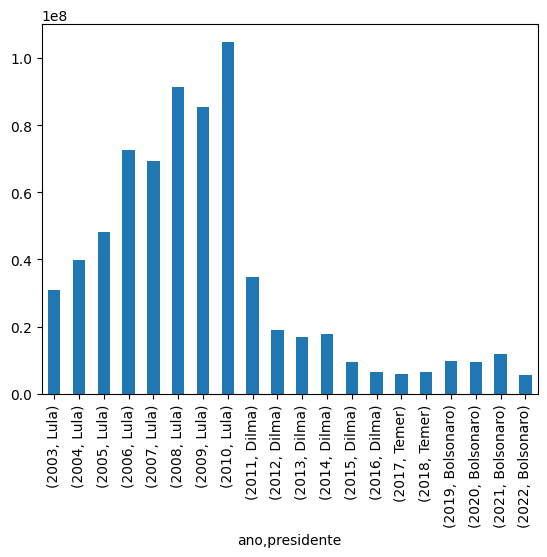

In [32]:
df_plot = data.groupby(['ano', 'presidente']).valor_hist_ajustado.sum()

df_plot.plot(kind="bar")
plt.show()

In [42]:
sum_by_year = data.groupby(['ano', 'presidente']).valor.sum()

sum_by_year.reset_index()

,ano,presidente,valor
0,2003,Lula,10387618.87
1,2004,Lula,14315931.77
2,2005,Lula,18437690.16
3,2006,Lula,28959353.01
4,2007,Lula,28623522.74
5,2008,Lula,39976393.58
6,2009,Lula,39036127.47
7,2010,Lula,50582989.81
8,2011,Dilma,17813746.06
9,2012,Dilma,10332834.91


## EDA

Vendo outliers

In [54]:
#data.valor_hist_ajustado.quantile([0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.9999])

nivel = data.valor_hist_ajustado.quantile(0.9999)

data_sem_outliers = data[data["valor_hist_ajustado"] < nivel]

data_sem_outliers.groupby('presidente').valor.sum()


presidente
Bolsonaro    3.013740e+07
Dilma        5.832489e+07
Lula         2.281328e+08
Temer        9.540671e+06
Name: valor, dtype: float64

## Filtrando linhas duplicadas

In [61]:
## teste drop_duplicates

df_droped = 

(631725, 14)